In [1]:
from fastai.vision.all import *
from fastbook import search_images_ddg
import os
from pathlib import Path
from PIL import Image

print("Importações realizadas com sucesso")

# Lista das 10 espécies de grandes felinos
species = [
    "Panthera leo", "Panthera tigris", "Panthera onca", 
    "Panthera pardus", "Puma concolor", 
    "Panthera uncia", "Neofelis nebulosa"
]

print("Lista de espécies de grandes felinos definida com sucesso")

# Função para buscar e baixar imagens
def download_images_for_species(species_list, num_images=100):
    path = Path('big_cats')
    if not path.exists():
        path.mkdir()
    
    for specie in species_list:
        dest = (path/specie.replace(" ", "_"))
        dest.mkdir(exist_ok=True)
        print(f"Baixando imagens para {specie}...")
        results = search_images_ddg(f'{specie} photo', max_images=num_images)
        download_images(dest, urls=results)
        resize_images(dest, max_size=400, dest=dest)
        failed = verify_images(get_image_files(dest))
        failed.map(Path.unlink)
        print(f"Imagens para {specie} baixadas com sucesso.")

# Baixar imagens
download_images_for_species(species, num_images=100)

print("Imagens baixadas e verificadas com sucesso.")

# Verificar o diretório atual
print("Diretório atual:", os.getcwd())

# Verificar o conteúdo do diretório 'big_cats'
print("Conteúdo do diretório 'big_cats':", os.listdir('big_cats'))


Importações realizadas com sucesso
Lista de espécies de grandes felinos definida com sucesso
Baixando imagens para Panthera leo...
Imagens para Panthera leo baixadas com sucesso.
Baixando imagens para Panthera tigris...
Imagens para Panthera tigris baixadas com sucesso.
Baixando imagens para Panthera onca...
Imagens para Panthera onca baixadas com sucesso.
Baixando imagens para Panthera pardus...
Imagens para Panthera pardus baixadas com sucesso.
Baixando imagens para Acinonyx jubatus...
Imagens para Acinonyx jubatus baixadas com sucesso.
Baixando imagens para Puma concolor...
Imagens para Puma concolor baixadas com sucesso.
Baixando imagens para Panthera uncia...
Imagens para Panthera uncia baixadas com sucesso.
Baixando imagens para Neofelis nebulosa...
Imagens para Neofelis nebulosa baixadas com sucesso.
Baixando imagens para Panthera leo persica...
Imagens para Panthera leo persica baixadas com sucesso.
Baixando imagens para Panthera tigris altaica...
Imagens para Panthera tigris a

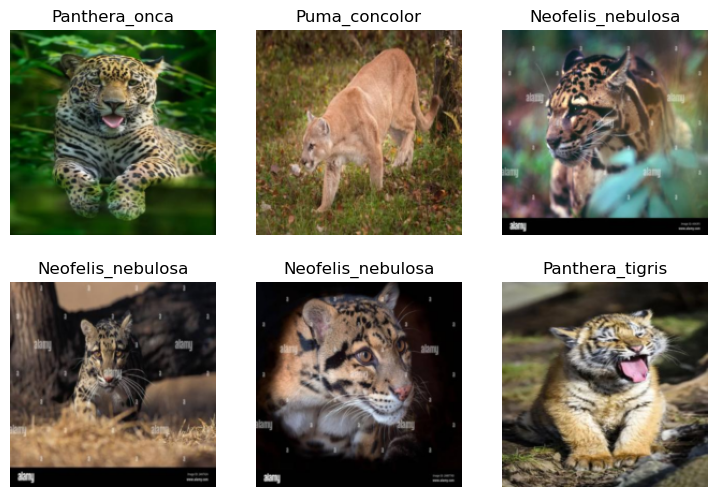

In [8]:
# Definir DataBlock
big_cats_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
)

# Criar DataLoaders
dls = big_cats_data.dataloaders(Path('big_cats'))
dls.show_batch(max_n=6)



In [9]:
# Criar o modelo
learn = cnn_learner(dls, resnet18, metrics=error_rate)


C:\Users\enric\anaconda3\envs\new_fastai_env\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\enric\anaconda3\envs\new_fastai_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\enric\anaconda3\envs\new_fastai_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
# Treiar o modelo
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,2.440002,0.674546,0.195312,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.583983,0.493218,0.164062,00:21
1,0.403214,0.516128,0.164062,00:22
2,0.275125,0.534554,0.156250,00:22
3,0.201627,0.566629,0.156250,00:22
4,0.150848,0.538395,0.148438,00:22
5,0.117636,0.524839,0.148438,00:22


Image: Neofelis_nebulosa.jpg
This is a: Neofelis_nebulosa.
Probability it's a Neofelis_nebulosa: 0.9997
------------------------------


Image: panthera_concolor.jpeg
This is a: Puma_concolor.
Probability it's a Puma_concolor: 0.9983
------------------------------


Image: Panthera_leo.jpg
This is a: Panthera_leo.
Probability it's a Panthera_leo: 1.0000
------------------------------


Image: panthera_onca.JPG
This is a: Panthera_onca.
Probability it's a Panthera_onca: 1.0000
------------------------------


Image: panthera_pardus.jpg
This is a: Panthera_pardus.
Probability it's a Panthera_pardus: 0.9980
------------------------------


Image: panthera_tigris.jpg
This is a: Panthera_tigris.
Probability it's a Panthera_tigris: 0.9916
------------------------------


Image: panthera_uncia.jpeg
This is a: Panthera_uncia.
Probability it's a Panthera_uncia: 0.9982
------------------------------


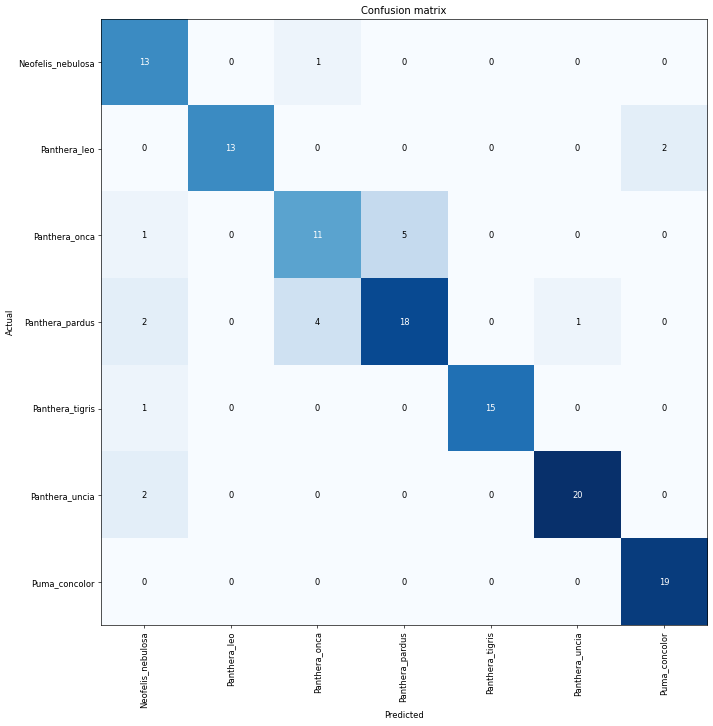

In [11]:
# Avaliar o modelo
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

image_folder = Path('Big_cats_ex')

# Verificar se a pasta existe
if not image_folder.exists():
    print(f"Pasta {image_folder} não encontrada.")
else:
    # Iterar sobre cada imagem na pasta
    for img_path in image_folder.iterdir():
        if img_path.is_file():
            img = PILImage.create(img_path)
            is_cat, _, probs = learn.predict(img)
            print(f"Image: {img_path.name}")
            print(f"This is a: {is_cat}.")
            print(f"Probability it's a {is_cat}: {probs.max():.4f}")
            print("-" * 30)